In this small tutorial we show how to create and access a multiresolution wavelet filter bank for Morlet filters in 2D, using the functions in filter_bank.py
We will start by creating a filter bank, showing the filters ordered by angle and scale. Then, we show how to convert this filterbank into a multiresolution filter bank. Finally, we show how to generate the multiresolution filter bank in one call to a function. 	

params consistent? J2= 5  L2= 8  N2= 128
Show low pass filter in the Fourier domain


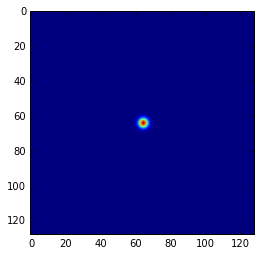

.. and the band pass filters in the Fourier domain:
j= 0


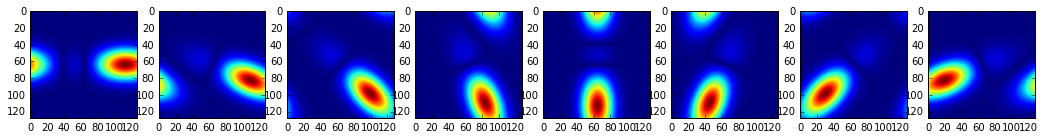

j= 1


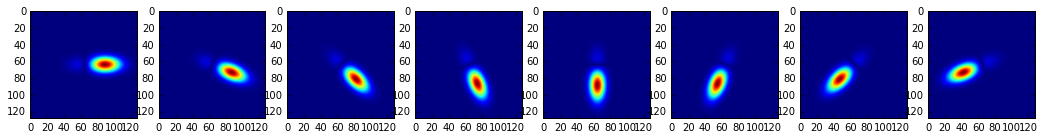

j= 2


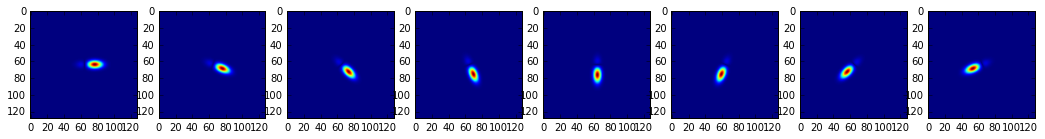

j= 3


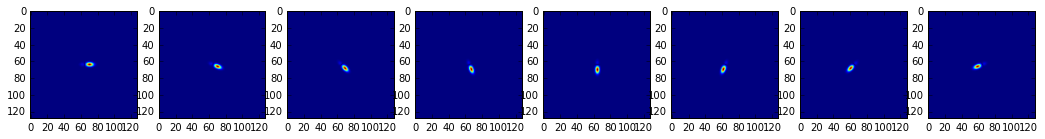

j= 4


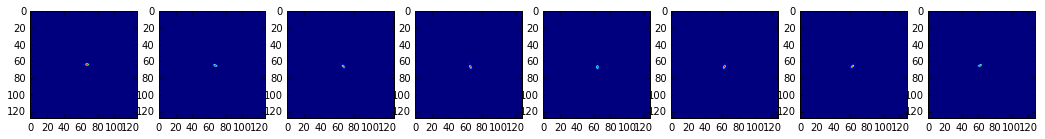

Littlewood paley (should be all =1 aprox.). Note that we do not need the negative frequencies.


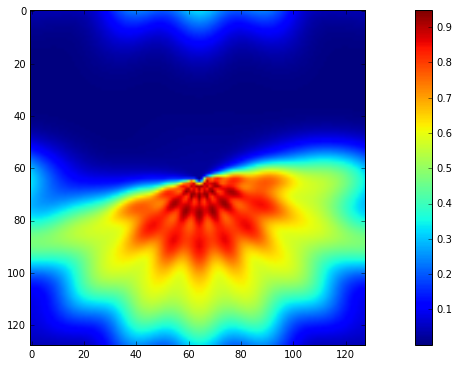

In [2]:
from scattering.filter_bank import filter_bank_morlet2d,multiresolution_filter_bank_morlet2d
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

J = 5 #number of scales
L = 8 #number of angles
px = 128 #size of the filters
sigma_phi=0.6957 #std_0 of the low pass filter
sigma_xi=0.8506  #std_0 of the band pass filters

filters, littlewood = filter_bank_morlet2d(px, J=J, L=L, sigma_phi=sigma_phi, sigma_xi= sigma_xi)

#We can access the values of J,L and px, directly from the ouput
J2 = len(filters['psi']) #scales
L2 = len(filters['psi'][0]) #angles
N2 = filters['psi'][0].shape[-1] #size at max scale

print('params consistent? J2=',J2,' L2=',L2,' N2=', N2)
print('Show low pass filter in the Fourier domain')
plt.imshow(np.abs(np.fft.fftshift(filters['phi'])))
plt.show()
print('.. and the band pass filters in the Fourier domain:')

for j in np.arange(0,J):
    print('j=',j)
    plt.figure(figsize=(18,6))
    for l in np.arange(0,L):
        plt.subplot(1, L, l+1)
        plt.imshow(np.abs(np.fft.fftshift(filters['psi'][j][l, :, :])))
    
    plt.show()    
  
#Finally we want to check the quality of the filter bank by checking the Littlewood-paley sum
print('Littlewood paley (should be all =1 aprox.). Note that we do not need the negative frequencies.')
plt.figure(figsize=(18,6))
plt.imshow(np.fft.fftshift(littlewood))
plt.colorbar()
plt.show()

Now that we have the complete set of filters in the Fourier domain, we would like to extend them to different resolutions, meaning, we would like to be able to apply them to images with different sizes. 

We can fix a certain j and l, and observe the filters for different resolutions
j= 3  l= 5


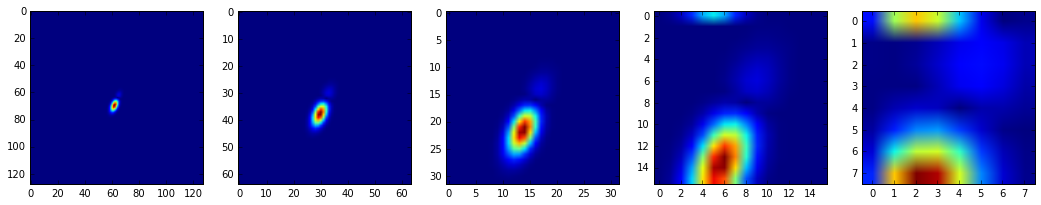

In [11]:
from scattering.filter_bank import filterbank_to_multiresolutionfilterbank

multiresolution_wavelet_filters = filterbank_to_multiresolutionfilterbank(filters, J)

j=3
l=5

print('We can fix a certain j and l, and observe the filters for different resolutions') 
print('j=',j,' l=',l)

num_resolutions = len(multiresolution_wavelet_filters['psi'])
plt.figure(figsize=(18,6))

for r in np.arange(0,num_resolutions):
    plt.subplot(1,num_resolutions,r+1)
    f = multiresolution_wavelet_filters['psi'][r][j][l,:,:]
    plt.imshow(np.abs(np.fft.fftshift(f)))
    
plt.show()


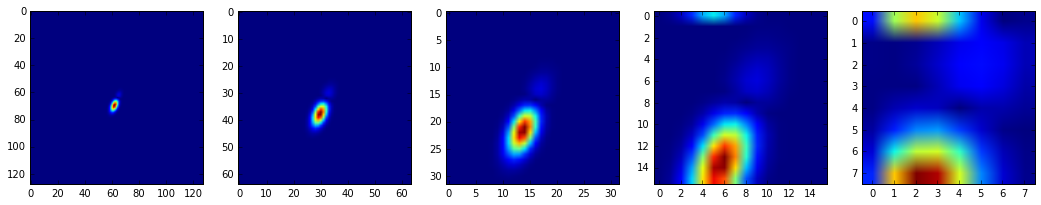

In [16]:
from scattering.filter_bank import multiresolution_filter_bank_morlet2d
#Finally, we can get directly the multiresolution filterbank by just doing the following: 
wavelet_bnk,littlewood_p = multiresolution_filter_bank_morlet2d(px, J=J, L=L, sigma_phi=sigma_phi, sigma_xi= sigma_xi)
plt.figure(figsize=(18,6))
for r in np.arange(0,num_resolutions):
    plt.subplot(1,num_resolutions,r+1)
    f = wavelet_bnk['psi'][r][j][l,:,:]
    plt.imshow(np.abs(np.fft.fftshift(f)))
 